sat
[x_67_1 = -13,
 y_20_1 = 237,
 y_24_1 = 91,
 y_35_1 = 99,
 x_24_1 = 275,
 y_2_1 = 31,
 y_7_1 = 305,
 y_66_1 = 317,
 x_38_1 = 262,
 x_51_1 = -22,
 y_71_1 = 314,
 y_84_1 = 285,
 x_34_1 = 268,
 y_51_1 = 324,
 x_97_1 = -1,
 x_16_1 = -36,
 y_5_1 = 296,
 y_4_1 = 303,
 y_31_1 = 93,
 x_32_1 = -29,
 y_74_1 = 73,
 y_0_1 = 299,
 y_1_1 = 51,
 x_0_1 = 301,
 x_98_1 = 202,
 x_76_1 = -9,
 y_38_1 = 68,
 x_21_1 = -34,
 y_25_1 = 336,
 y_55_1 = 321,
 x_44_1 = -25,
 y_58_1 = 319,
 x_39_1 = 261,
 x_68_1 = 231,
 x_37_1 = 263,
 x_12_1 = -39,
 y_47_1 = 46,
 y_85_1 = 307,
 y_14_1 = 15,
 y_18_1 = 338,
 x_87_1 = 214,
 x_92_1 = -4,
 y_12_1 = 342,
 y_72_1 = 313,
 y_57_1 = 320,
 y_36_1 = 330,
 x_11_1 = -40,
 y_42_1 = 44,
 x_1_1 = 300,
 x_20_1 = 279,
 x_50_1 = -21,
 x_42_1 = 201,
 y_21_1 = 337,
 y_86_1 = 236,
 y_13_1 = 341,
 y_93_1 = 305,
 x_3_1 = 298,
 x_66_1 = -14,
 x_22_1 = 278,
 x_55_1 = -18,
 y_53_1 = 54,
 x_62_1 = 233,
 y_65_1 = 66,
 x_81_1 = 219,
 y_87_1 = 235,
 x_46_1 = -23,
 x_96_1 = 205,
 x_23_1 = 277,


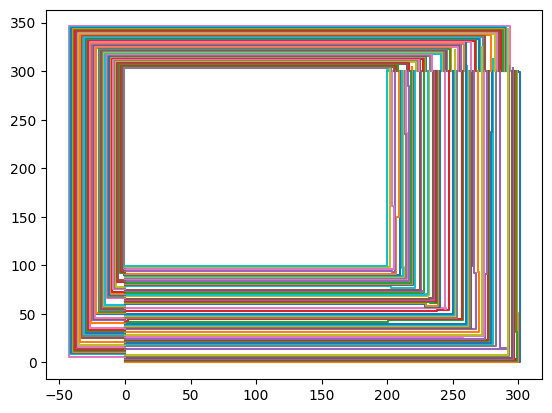

In [1]:
from matplotlib import pyplot as plt

import z3
z3.set_param("parallel.enable", "true")

def Abs(x):
    return z3.If(x >= 0,x,-x)

def Max(x, y):
    return z3.If(x>=y, x, y)

def Min(x, y):
    return z3.If(x<=y, x, y)

def collision(xa1, xa2, ya, xb, yb1, yb2):
    return z3.Or(xb < Min(xa1,xa2) , xb > Max(xa1,xa2) , ya < Min(yb1,yb2) , ya > Max(yb1,yb2))

def make_sig(x, y, n=4):
    return [(x[int(i/2)],x[int(i/2+1)],y[int(i/2)]) if i%2==0 else (x[int(i/2+0.5)],y[int(i/2)],y[int(i/2+0.5)]) for i in range(n)]

def collision_model(sig1, sig2):
    l = []
    for i1, s1 in enumerate(sig1):
        for i2, s2 in enumerate(sig2):
            if i1 % 2 == 0:
                if i2 % 2 == 1:
                    l.append(collision(s1[0], s1[1], s1[2], s2[0], s2[1], s2[2]))
            if i1 % 2 == 1:
                if i2 % 2 == 0:
                    l.append(collision(s2[0], s2[1], s2[2], s1[0], s1[1], s1[2]))
    return l

def declare_all_signals(nbr_sigs, nbr_segms):
    return [[[z3.Int(f"x_{k}_{i}"), z3.Int(f"y_{k}_{i}")] for i in range(nbr_segms)] for k in range(nbr_sigs)]

def make_all_signals(s):
    return [make_sig([x[0] for x in e], [y[1] for y in e], int(2*len(e)-2)) for e in s]

def sigs2plot(m, pts):
    xv = [[m[e[0]].as_long() for e in p if m[e[0]] is not None] for p in pts]
    yv = [[m[e[1]].as_long() for e in p if m[e[1]] is not None] for p in pts]
    v = [[(xv[k][int(i/2+0.5)], yv[k][int(i/2)]) for i in range(len(xv[k])+len(yv[k])-1)] for k in range(len(xv))]
    return [h for g in [[*zip(*f)] for f in v] for h in g]

def make_all_collisions(sigs):
    return [e for i in range(len(sigs)) for k in range(len(sigs)) for e in collision_model(sigs[i],sigs[k]) if i != k]
    

s = z3.Solver()



pts = declare_all_signals(100, 3)



sigs = make_all_signals(pts)

s.add(make_all_collisions(sigs))

for k in pts:
    for l in k:
        for m in l:
            s.add(m > -200)
            s.add(m < 500)
        
for i in range(len(pts)):
    s.add(pts[i][0][0] == 0)
    s.add(pts[i][0][1] == i)
    s.add(pts[i][-1][0] == 300-i)
    s.add(pts[i][-1][1] == 300)


print(s.check())
m = s.model()
print(m)


plt.plot(*sigs2plot(m,pts))

plt.show()

